In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos

################################
######  MEDICINA NUCLEAR #######
################################

###Activimetro CRC 25 PET con fuente Cs-137
data = pd.read_csv('ActPET.txt', delim_whitespace =True)

###Activimetro 55tR con fuente Co-57
#data = pd.read_csv('ActSPECT.txt', delim_whitespace =True)


#data.head()

In [72]:
data.describe()

,Number,AjustemV,Fondo,Voltaje,Actividad,Desviacion
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,184.500000,-0.197120,6.261033,513.702446,206.149457,3.116304
std,106.376689,0.033454,18.064371,1.169210,2.818226,0.774249
min,1.000000,-0.400000,-20.400000,510.000000,200.000000,-3.400000
25%,92.750000,-0.200000,3.875000,513.200000,204.000000,2.700000
50%,184.500000,-0.190000,5.300000,513.700000,206.000000,3.200000
75%,276.250000,-0.190000,6.685000,514.000000,209.000000,3.500000
max,368.000000,-0.100000,347.000000,519.500000,213.000000,7.200000


In [73]:
##### de mCi a Bq
mcibq=3.7E7

##### de uCi a Bq
ucibq=3.7E4

## Fuentes Chequeo MN

In [74]:
### Fuentes de Chequeo en Medicina Nuclear 

##############################
########   Co 57  ###########

#Fecha de referencia
# primero de noviembre de 2015
Co='01/11/2015'
Co57= datetime.datetime.strptime(Co,'%d/%m/%Y')
#Actividad en mCi
AcCo= 5.774
#Actividad en Bq [1/s]
#AcCobq= AcCo*mcibq
### half life [días]
HLCo= 271.74
### half life [s]
HLCobq= 271.74*86400
### Lambda
Lambdaco= np.log(2)/HLCo
### Lambda [1/s]
Lambdacobq= np.log(2)/HLCobq

#############################################
######## Medicina Nuclear Cs 137  ###########

#Fecha de referencia
# primero de noviembre de 2015
Cs='01/11/2015'
Cs137= datetime.datetime.strptime(Cs,'%d/%m/%Y')
#Actividad en uCi
AcCs= 214.9
#Actividad en Bq [1/s]
#AcCsbq= AcCs*ucibq
### half life  [días]
HLCs= 30.08*365
### half life [s]
HLCsbq= HLCs*86400
### Lambda
Lambdacs= np.log(2)/HLCs
### Lambda [1/s]
Lambdacsbq= np.log(2)/HLCsbq



#############################################
######## Radiofarmacia Cs 137  ###########

#Fecha de referencia
# primero de Abril de 2007
#Csrf='01/04/2007'
#Cs137rf= datetime.datetime.strptime(Csrf,'%d/%m/%Y')
#Actividad en uCi
#AcCsrf= 190.1
#Actividad en Bq [1/s]
#AcCsrfbq= AcCsrf*ucibq


### Lambda
Lambdacsrf= np.log(2)/HLCs

In [75]:
# import the visualization package: seaborn
#import seaborn as sns

In [76]:
#sns.set_context("talk",font_scale=1.4)

# PHASE 1 

In [77]:
##data['Actividad'][0:30]

## Medición de actividad 

In [78]:
##########   Co-57
#data['Incer']=(np.sqrt((data['Actividad']*mcibq)*Lambdacobq))/mcibq

##########   Cs-137
#data['Incer']=(np.sqrt((data['Actividad']*ucibq)*Lambdacsbq))/ucibq

### Practical Mathematics in Nuclear Medicine Technology, Patricia Wells

In [81]:
################# Elapsed time ###############

#data["Fecha"][0]

d = pd.to_datetime(data["Fecha"],format='%m/%d/%y')
###Cobalto 57
#timeE=(d-Co57)

### Cesio 137
timeE=(d-Cs137)
#timeE=(d-Cs137rf)

In [82]:
data['timeE']=timeE.dt.days.values

In [83]:
############# Expected Activity ###########
#### Act =Act_oe^{-\lambda t}

###Cobalto 57
#Actco=AcCo*np.exp(-Lambdaco*data["timeE"])*1000

###Cesio 137
Actcs=AcCs*np.exp(-Lambdacs*data["timeE"])

In [84]:
#### Cobalto 57
#data['EAct']=round(Actco,1)
#### Cesio 137
data['EAct']=round(Actcs,1)

In [85]:
############# Acceptable Range of dose calibrator readings ###########

### 10% ó 5%
X=data['EAct']*(0.05)


### Rango
Rmin=np.round(data['EAct']-X,1)
Rmax=np.round(data['EAct']+X,1)


### Ingresar datos en el data 
data['Rmin']=Rmin
data['Rmax']=Rmax

In [86]:
### Plot the data
#ax1=plt.subplot(1,1,1)

#ax1.errorbar(data['Number'],data['Actividad'],yerr=data['Incer'],fmt='.r',label='Experimento',capsize=6)
#ax1.plot(data['Number'],data['Rmin'],'b--')
#ax1.plot(data['Number'],data['Rmax'],'b--')


#ax1.set_title('Actividad Co-57 CRC 55tR MN',fontsize=14)
#ax1.set_xlabel('Número de Medida diaria',fontsize=14)
#ax1.set_ylabel('Actividad [$\mu$Ci]',fontsize=14)
#ax1.tick_params(axis='both',labelsize=14)
#ax1.legend()
#ax1.set_yscale('log')
## Set second y-axis for MBq
#ax2 = ax1.twinx()
#kBqs = np.linspace(data['Actividad'].min(),data['Actividad'].max()*37,6) # Actividad en MBq
#ax2.set_yticks(kBqs/37) # Ponga los ticks
#ax2.set_yticklabels(kBqs.astype(int)) # Ponga los Labels
#ax2.yaxis.set_ticks_position('right') # set the position of the second x-axis to bottom
#ax2.yaxis.set_label_position('right') # set the position of the second x-axis to bottom
#ax2.spines['right'].set_position(('outward', 0))
#ax2.set_ylabel('Actividad [kBq]',fontsize=14)
#ax2.set_ylim(ax1.get_ylim())
#ax2.tick_params(axis='y',labelsize=14)


#plt.savefig('mncrc55tRcs.pdf')

#plt.legend()
#plt.title('TODOS')
#plt.ylabel('Actividad [$\mu$Ci]')
#plt.xlabel('Measurement number')

#### Percent error for dose calibrator accuracy and constancy, Pag 104

In [87]:
##Diferencia
#perce=np.absolute(((data['EAct']-data['Actividad'])*100)/data['EAct'])
perce=(-(data['EAct']-data['Actividad'])*100)/data['EAct']


percent=round(perce,1)

### Ingresar datos en el data 
data['percent']=percent
#percent

In [88]:
#plt.plot(data['Number'],data['percent'],'bo-')
#plt.plot((0, 439),(5,5), 'k:', linewidth=2) 
#plt.plot((0, 439),(-5,-5), 'k:', linewidth=2) 

#### Percent Outside

In [89]:
len(data[(np.absolute(data['percent'])>5.0)])

6

In [90]:
data[(np.absolute(data['percent'])>5.0)]

,Number,Fecha,AjustemV,Fondo,Voltaje,Actividad,Desviacion,timeE,EAct,Rmin,Rmax,percent
151,152,10/23/18,-0.20,3.06,514.2,211.0,4.5,1087,200.6,190.6,210.6,5.2
158,159,11/01/18,-0.20,2.06,514.2,212.0,4.6,1096,200.5,190.5,210.5,5.7
224,225,02/19/19,-0.13,3.50,514.2,211.0,5.7,1206,199.1,189.1,209.1,6.0
232,233,03/01/19,-0.21,4.16,513.6,213.0,3.1,1216,199.0,189.0,209.0,7.0
312,313,07/31/19,-0.22,4.60,513.0,208.0,5.4,1368,197.1,187.2,207.0,5.5
363,364,11/25/19,-0.19,4.50,513.1,209.0,1.8,1485,195.7,185.9,205.5,6.8


### Razones de Actividades 
\begin{equation}
\frac{\text{Actividad Medida}}{\text{Actividad Esperada}}
\end{equation}

In [91]:
razon=data['Actividad']/data['EAct']
#razoninc=data['Incer']/data['EAct']
data['razon']=round(razon,3)
#data['razon'].head(10)

#### Razón Outside

In [92]:
## Cuantos datos por fuera del rango según servicio
len(data[(data['razon']<0.95) | (data['razon']>1.05)])

6

In [93]:
#data[(data['razon']<0.95) | (data['razon']>1.05)]
data['razon'][0:31]

0     1.037
1     1.023
2     1.023
3     1.023
4     1.024
5     1.024
6     1.029
7     1.019
8     1.019
9     1.020
10    1.020
11    1.029
12    1.029
13    1.030
14    1.030
15    1.030
16    1.030
17    1.030
18    1.030
19    1.031
20    1.031
21    1.026
22    1.026
23    1.026
24    1.027
25    1.017
26    1.027
27    1.027
28    1.031
29    1.027
30    1.027
Name: razon, dtype: float64

## Amplifier offset 

In [37]:
#plt.plot(data['Number'],data['AjustemV'],'ob-')

In [38]:
#data['AjustemV'].value_counts()

In [94]:
###### Diferencia entre datos
diffajuste = data.AjustemV.diff()
diffajuste.replace(np.nan, 0.0, inplace=True)
data['Diffzero']=diffajuste

In [95]:
data['Diffzero'].describe()

count    368.000000
mean       0.000000
std        0.039077
min       -0.200000
25%       -0.010000
50%        0.000000
75%        0.010000
max        0.200000
Name: Diffzero, dtype: float64

#### Offset Outside

In [96]:
## Cuantos datos por fuera del rango según fabricante
len(data[(np.absolute(data['Diffzero'])>0.3)])

0

In [97]:
#data[(np.absolute(data['Diffzero'])>0.3)]

### Voltaje

In [98]:
#plt.plot(data['Number'],data['Voltaje'],'b-')

In [102]:
#####  EQUIPOS 15R y  25 PET
Z=data['Voltaje'].mean()*(0.05)
Zmin=data['Voltaje'].mean()-Z
Zmax=data['Voltaje'].mean()+Z

#### Voltaje Outside

In [103]:
###fabricante 25 PET MN
len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])
## Cuantos datos por fuera del rango según fabricante 55tR MN
#len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])

0

In [46]:
#data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)]

### Fondo

In [47]:
#plt.plot(data['Number'],data['Fondo'],'ob-')

In [104]:
## Cuantos datos por fuera del protocolo INC 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])

5

In [105]:
#data[(data['Fondo']<0.0) | (data['Fondo']>15.0)]

# Limpieza Datos -Outliers
### CAPINTEC

In [106]:
######  Medicina Nuclear
###   CAPINTEC 25 PET MN 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])
###   CAPINTEC 55 tR MN
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+ len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])

11

In [107]:
data.loc[np.absolute(data['percent'])>5.0]= np.nan
data.dropna(subset=["percent"], axis=0, inplace=True)

In [108]:
#Localización y conversión a Not a Number NaN
data.loc[(data['razon']<0.95) | (data['razon']>1.05)]= np.nan
# simply drop whole row with NaN in "razon" column
data.dropna(subset=["razon"], axis=0, inplace=True)

In [109]:
#Localización y conversión a Not a Number NaN
data.loc[np.absolute(data['Diffzero'])>0.3]= np.nan
# simply drop whole row with NaN in "Fondo" column
data.dropna(subset=["Diffzero"], axis=0, inplace=True)

In [110]:
#Localización y conversión a Not a Number NaN
data.loc[(data['Fondo']<0.0) | (data['Fondo']>15.0)]= np.nan
# simply drop whole row with NaN in "Fondo" column
data.dropna(subset=["Fondo"], axis=0, inplace=True)

### Voltaje

In [111]:
##########################   Voltaje  ######################################
#Localización y conversión a Not a Number NaN
####### CAPINTEC 25 PET MN
data.loc[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)]= np.nan
####### CAPINTEC 55 tR MN
#data.loc[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)]= np.nan

In [112]:
# simply drop whole row with NaN in "Voltaje" column
data.dropna(subset=["Voltaje"], axis=0, inplace=True)

In [113]:
#reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [114]:
###   CAPINTEC 25 PET MN 
len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+len(data[(data['Voltaje']<Zmin) | (data['Voltaje']>Zmax)])
###   CAPINTEC 55 tR MN
#len(data[(data['Fondo']<0.0) | (data['Fondo']>15.0)])+ len(data[(data['razon']<0.95) | (data['razon']>1.05)])+len(data[(np.absolute(data['Diffzero'])>0.3)])+ len(data[(data['Voltaje']<147.5) | (data['Voltaje']>163.1)])

0

### Datos para Phase I

In [115]:
data[['AjustemV','Diffzero','Fondo','Voltaje','percent','razon']].describe()

,AjustemV,Diffzero,Fondo,Voltaje,percent,razon
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,-0.196807,0.000448,5.346190,513.719048,3.021008,1.030210
std,0.033283,0.038662,2.561457,1.171250,0.770110,0.007701
min,-0.400000,-0.200000,0.000000,510.000000,-0.700000,0.993000
25%,-0.200000,-0.010000,3.950000,513.300000,2.700000,1.027000
50%,-0.190000,0.000000,5.300000,513.700000,3.100000,1.031000
75%,-0.190000,0.010000,6.670000,514.000000,3.500000,1.035000
max,-0.100000,0.200000,14.230000,519.500000,5.000000,1.050000


In [60]:
#plt.plot(data['AjustemV'])
#plt.plot(data['Diffzero'])
#plt.plot(data['Fondo'])
#plt.plot(data['Voltaje'])
#plt.plot(data['percent'])
#plt.plot(data['razon'])

In [61]:
#plt.hist(data['AjustemV'])
#plt.hist(data['Diffzero'])
#plt.hist(data['Fondo'])
#plt.hist(data['Voltaje'])
#plt.hist(data['percent'])
#plt.hist(data['razon'])

In [116]:
from scipy.stats import skew, kurtosis

In [117]:
#### Kurtosis
#3+kurtosis(data['AjustemV'])

In [118]:
### Skew
#skew(data['AjustemV'])

In [119]:
xb=np.sort(data['Fondo'])

# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(xb, dist='norm')

#plot results
plt.plot(values, quantiles,'+b')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#plt.xlim([1.01,1.06])
#define ticks
ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]

#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]
#assign new ticks
plt.yticks(ticks_quan,ticks_perc)

Text(0.5,1,'Gráfico de probabilidad normal')

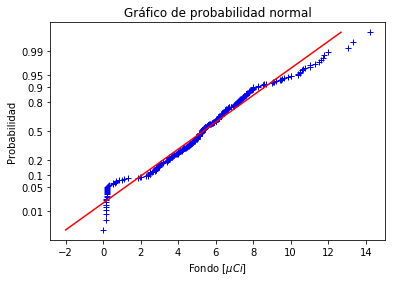

In [123]:
# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(xb, dist='norm')

#plot results
plt.plot(values, quantiles,'+b')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#define ticks
ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]

#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]
#assign new ticks
plt.yticks(ticks_quan,ticks_perc)
plt.xlabel('Fondo [$\mu Ci$]')
plt.ylabel('Probabilidad')
plt.title('Gráfico de probabilidad normal')

## Capintec 25 PET MN: 
#### AjustemV: 

\begin{equation}
\text{Kurtosis}=10.60\;\;\; \text{Skewness}=-1.42
\end{equation}
    
#### Diffzero: 

\begin{equation}
\text{Kurtosis}=8.52\;\;\; \text{Skewness}=0.31
\end{equation}    

#### Fondo: 

\begin{equation}
\text{Kurtosis}=3.69\;\;\; \text{Skewness}=0.25
\end{equation} 

#### Voltaje: 

\begin{equation}
\text{Kurtosis}=13.52\;\;\; \text{Skewness}=2.32
\end{equation} 

#### percent: 

\begin{equation}
\text{Kurtosis}=10.06\;\;\; \text{Skewness}=-1.92
\end{equation} 

#### razon: 

\begin{equation}
\text{Kurtosis}=10.06\;\;\; \text{Skewness}=-1.92
\end{equation} 

## Capintec 55 tR MN: 
#### AjustemV: 

\begin{equation}
\text{Kurtosis}=39.376551\;\;\; \text{Skewness}=5.972
\end{equation}
    
#### Diffzero: 

\begin{equation}
\text{Kurtosis}=69.9264829\;\;\; \text{Skewness}=0.14881
\end{equation}    

#### Fondo: 

\begin{equation}
\text{Kurtosis}=3.687477\;\;\; \text{Skewness}=1.4787154
\end{equation} 

#### Voltaje: 

\begin{equation}
\text{Kurtosis}=85.0116\;\;\; \text{Skewness}=-9.1657857
\end{equation} 

#### percent: 

\begin{equation}
\text{Kurtosis}=1.6218\;\;\; \text{Skewness}=0.3445
\end{equation} 

#### razon: 

\begin{equation}
\text{Kurtosis}=1.6218\;\;\; \text{Skewness}=0.3445
\end{equation} 

Asumir normalidad según kurtosis y skewness solo posible para los datos de Fondo

## Rejection data

In [374]:
to=(np.absolute(data['AjustemV']-data['AjustemV'].mean()))/data['AjustemV'].std()

In [375]:
prob=np.round(1-(norm.cdf(to)-norm.cdf(-to)),2)
data['prob']= prob

In [376]:
no= data['AjustemV'].count()*prob
#no

In [378]:
#len(no[no<0.5])
len(no[no<4.5])

13

In [379]:
data['no']= no

In [380]:
data.loc[np.absolute(data['no'])<4.5]= np.nan
data.dropna(subset=["no"], axis=0, inplace=True)
#reset index, because we droped rows
data.reset_index(drop=True, inplace=True)

In [381]:
data['AjustemV'].describe()

count    422.000000
mean       0.013578
std        0.004849
min        0.010000
25%        0.010000
50%        0.010000
75%        0.020000
max        0.030000
Name: AjustemV, dtype: float64

In [263]:
#plt.hist(data['percent'])

In [264]:
#sigma3p=data['percent'].mean()+(3*data['percent'].std())
#sigma3n=data['percent'].mean()-(3*data['percent'].std())

In [265]:
#grandmean=data['percent'].mean()grandmean

In [266]:
#plt.plot(data['Number'],data['percent'],'ob-')
#plt.plot((0,350),(sigma3p,sigma3p))
#plt.plot((0,350),(sigma3n,sigma3n))
#plt.plot((0,350),(grandmean,grandmean))

In [267]:
### Agrupar datos 
#y= data['AjustemV'].values.reshape(87,4)

In [268]:
#subgroup= pd.DataFrame(data=y)

In [269]:
# create headers list
#headers = ["n1","n2","n3","n4"]
#,"n5","n6"]
#subgroup.columns = headers

In [270]:
#mean=subgroup[["n1","n2","n3","n4"]].std(axis=1)
#subgroup['std']= mean

In [271]:
#subgroup['std'].mean()

# Grand

## Capintec 25 PET MN: 
#### AjustemV: 

\begin{equation}
\text{Grandmean}=-0.19482658959537574\;\;\; \text{Grandstd}=0.026
\end{equation}
    
#### Diffzero: 

\begin{equation}
\text{Grandmean}=-0.001079\;\;\; \text{Grandstd}= 0.028791
\end{equation}   

#### Fondo: 

\begin{equation}
\text{Grandmean}=5.276723\;\;\; \text{Grandstd}=1.24
\end{equation}

#### Voltaje: 

\begin{equation}
\text{Grandmean}=513.576744\;\;\; \text{Grandstd}=0.703871
\end{equation}

#### percent: 

\begin{equation}
\text{Grandmean}=3.094253\;\;\; \text{Grandstd}=0.564738
\end{equation}

#### razon: 

\begin{equation}
\text{Grandmean}= 1.030943\;\;\; \text{Grandstd}=0.005647
\end{equation}

In [382]:
z=np.array(data['AjustemV'])

In [383]:
np.savetxt('automatlab.txt',z,delimiter=" ",fmt='%s')